<a href="https://colab.research.google.com/github/itsMeJunaid/ML_Techniques_-_Strategies/blob/main/Supervised_vs_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

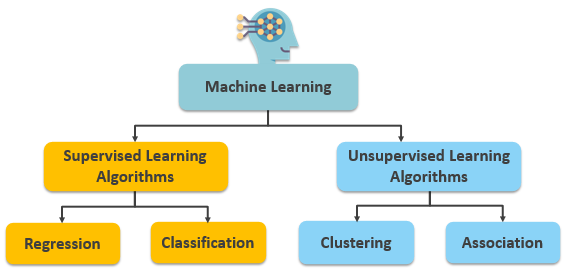

## Differentiation: Supervised vs. Unsupervised Learning

| Feature                | Supervised Learning       | Unsupervised Learning     |
|------------------------|---------------------------|---------------------------|
| **Goal**              | Predict outcomes based on labeled data. | Discover patterns in unlabeled data. |
| **Examples**          | Regression, Classification | Clustering, Dimensionality Reduction |
| **Algorithms**        | Linear Regression, Decision Trees | K-Means, PCA            |
| **Evaluation Metrics**| Accuracy, F1 Score, ROC-AUC | Cluster Variance, Explained Variance | **bold text**

# Supervised vs. Unsupervised Learning with Code Examples

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression, make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, roc_curve


## Creating Datasets for Demonstration

### For Supervised Learning

In [2]:
# Regression Dataset
X_reg, y_reg = make_regression(n_samples=500, n_features=1, noise=10, random_state=42)

# Classification Dataset
X_clf, y_clf = make_classification(n_samples=500, n_features=5, n_informative=3, random_state=42)

### For Unsupervised Learning

In [3]:
# Clustering Dataset
X_cluster, _ = make_blobs(n_samples=500, centers=3, random_state=42)

## Supervised Learning: Linear Regression

### What It Does
Linear regression predicts a continuous target variable by fitting a linear relationship between independent and dependent variables.

### Why Use
- Simple and interpretable.
- Effective for linearly separable data.


### Code Example

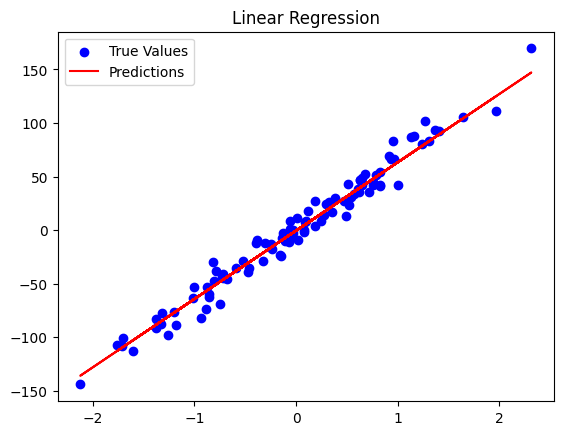

In [9]:
# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Training Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)

# Predictions
y_pred_reg = lr_model.predict(X_test_reg)

# Visualizing Results
plt.scatter(X_test_reg, y_test_reg, color='blue', label='True Values')
plt.plot(X_test_reg, y_pred_reg, color='red', label='Predictions')
plt.title("Linear Regression")
plt.legend()
plt.show()

## Supervised Learning: Decision Trees

### What It Does
Decision Trees classify or regress data by splitting it into decision nodes based on feature thresholds.

### Why Use
- Handles both categorical and continuous data.
- Captures non-linear relationships.

### Code Example

In [10]:
# Train-test split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Training Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_clf, y_train_clf)

# Predictions
y_pred_clf = dt_model.predict(X_test_clf)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_clf))
print("Classification Report:\n", classification_report(y_test_clf, y_pred_clf))

Confusion Matrix:
 [[47  4]
 [ 3 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        51
           1       0.92      0.94      0.93        49

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



Text(50.722222222222214, 0.5, 'True')

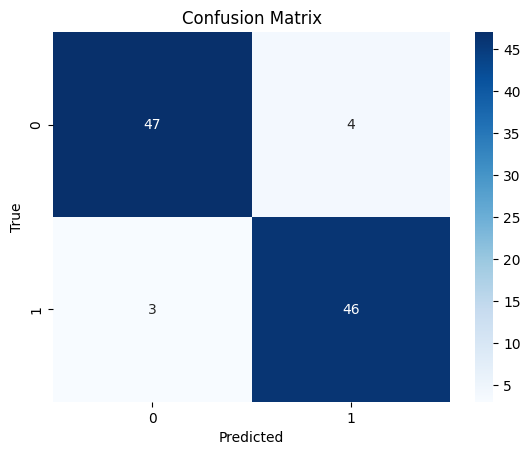

In [11]:
#Confusion Matrix Graph
cm = confusion_matrix(y_test_clf, y_pred_clf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

## Unsupervised Learning: K-Means Clustering
### What It Does
K-Means partitions the dataset into clusters by minimizing intra-cluster variance.

### Why Use
- Easy to implement.
- Effective for clustering similar data points.

### Code Example

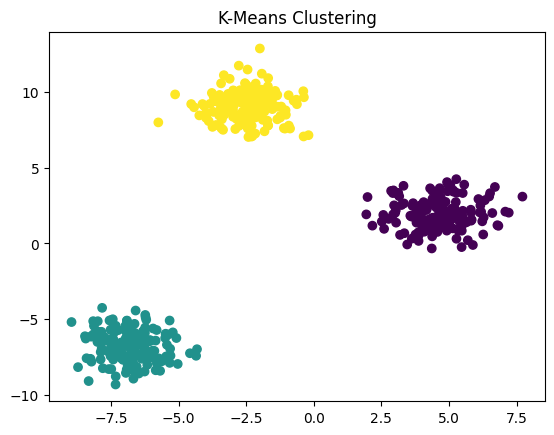

In [12]:
# Training K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_cluster)

# Assigning cluster labels
cluster_labels = kmeans.predict(X_cluster)

# Visualizing Clusters
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=cluster_labels, cmap='viridis')
plt.title("K-Means Clustering")
plt.show()

## Unsupervised Learning: Principal Component Analysis (PCA)

### What It Does
PCA reduces the dimensionality of the data while retaining maximum variance.

### Why Use
- Useful for visualizing high-dimensional data.
- Improves computational efficiency.

### Code Example

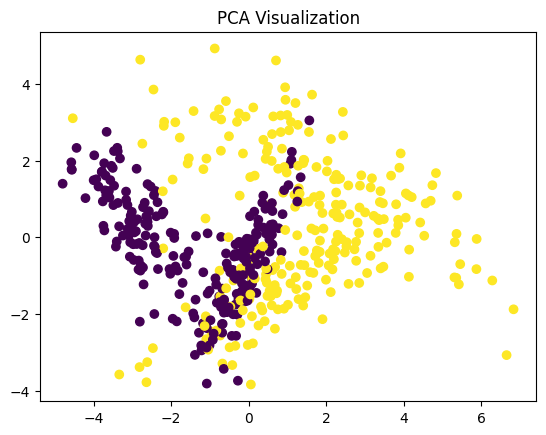

In [14]:
# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clf)

# Visualizing Reduced Data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_clf, cmap='viridis')
plt.title("PCA Visualization")
plt.show()



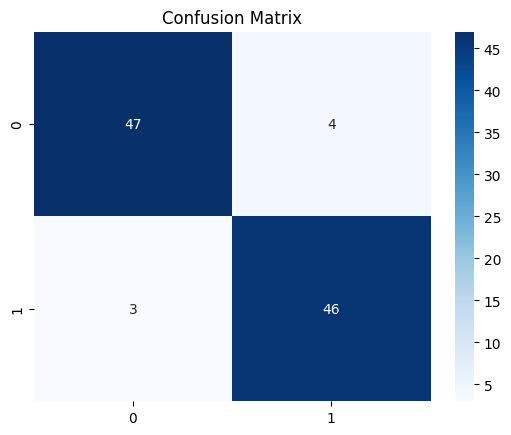

In [15]:
## Model Evaluation: Confusion Matrix and ROC-AUC

### Confusion Matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### ROC-AUC for Classification

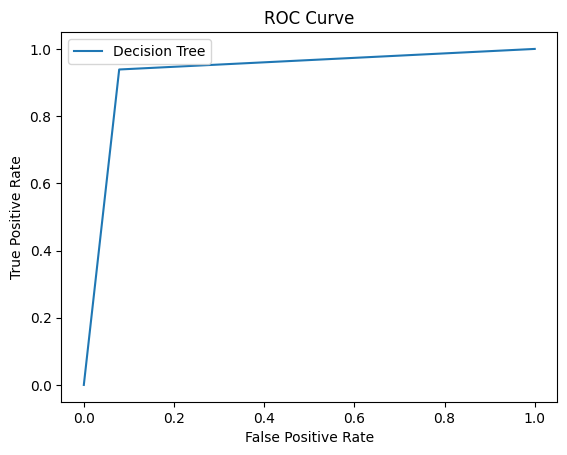

In [16]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test_clf, dt_model.predict_proba(X_test_clf)[:, 1])
plt.plot(fpr, tpr, label="Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Calculating AUC

In [17]:
roc_auc = roc_auc_score(y_test_clf, dt_model.predict_proba(X_test_clf)[:, 1])
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9301720688275311
